# M2 | Exploration Notebook -- Kai Cooper

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing. 
* $\color{red}{\text{{canton}: swiss canton}}$.
* class_level: school year in swiss system.


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* timestamp: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* session_id: session during which the event took place.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).


### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* $\color{red}{\text{{start_time}: timestamp of when the user started answering}}$.
* $\color{red}{\text{{commit_time}: timestamp of when the user submitted the answer}}$.
* user_agent: the browser that the user used.
* validation: used to validate the format of the input.
* solution: solution to question.
* $\color{red}{\text{{type}: type of question that was answered}}$. 


In [2]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = './data' #You many change the directory

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [3]:
## Your code goes here
print(users['user_id'].is_unique," ", f"We have {len(users['user_id'])} users in the dataset") #could also use nunique function

True   We have 13695 users in the dataset


#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

In [4]:
transactions.head()

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
3,1020790,79a7d731-a36b-4529-a11b-108b9f877a04,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636561847705,1.636562e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
4,1061970,a45b6464-371e-47f4-842c-34f9e345b4ec,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637146373965,1.637146e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE


Text(0.5, 1.0, 'Distribution of the number of transactions per user')

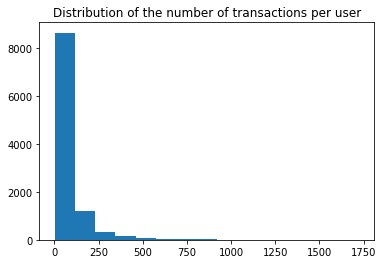

In [5]:
# Your code goes here
n_tran_per_user = transactions.groupby('user_id').count()
ax = n_tran_per_user.hist(column='transaction_id', grid=False, bins=15)
plt.title("Distribution of the number of transactions per user")

There are far fewer users with high transaction numbers than low transaction numbers. A distribution like this will raise questions such as: are students more activity on the site higher performers? This might explain why there are so few, seeing as la crème de la crème are not numerous (otherwise they wouldn't be so special). 

---


#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

In [6]:
events.head()

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
3,65,393211,1621583907589,TASK,VIEW_QUESTION,VIEW,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN
4,66,393211,1621584222588,TASK,SUBMIT_ANSWER,CLICK,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN


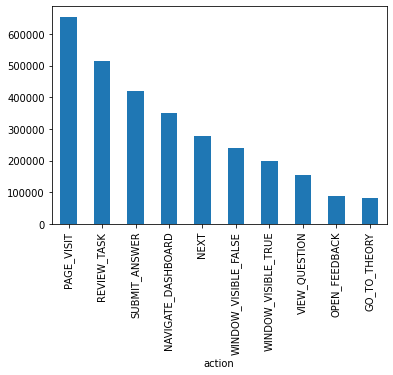

In [7]:
df_action_counts = events.groupby('action').count().sort_values(by='event_id', ascending=False)
top_ten_actions = df_action_counts['event_id'][0:10]
ax = top_ten_actions.plot(kind='bar')

The actions which are most often completed actions aren't very meaningful: they concern actions like, opening things or navigation -- although, this is to be expected because, for example, submitting an answer to a question is recorded as an action. Perhaps it would be more meaningful to look at the time-to-completion of activity, and compare. Although, we should note that `submit_answer` is the third most popular action (since ultimately this is the goal of the platform). 

---

## Task 2: Static Analysis

In this second task, you will do a univariate and multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

---

To begin, I have subsetted the events in `events_of_interest`, since the proportions of events which are academic, or directly related to learning are not as meaningful when taking into account all events. Of course, you may remove this list and proceed with the analysis as standard. 

In [8]:
#total number of events of the student, using a subset 
events_of_interest = ['VIEW_QUESTION', #submit answer not included (yet)
                      'GO_TO_THEORY',
                      'REVIEW_TASK', 
                      'ACCEPT_PROGRESS', 
                      'GO_TO_COMMENTS',
                      'REJECT_PROGRESS',
                      'REQUEST_HINT',
                      'OPEN_FEEDBACK',
                      'PRETEST']
events = events[events['action'].isin(events_of_interest)]
num_events = events.groupby('user_id').count()['event_id']

---

After some observations of the data, and a conversation with Paola, it seems that the 'number of questions' a student answers might be defined differently between the `events` table and the `transactions` table. Since we also wish to calculate the percentage of questions which were answered correctly, for the sake of consistency, it makes sense to use the `transaction` table to define the number of questions answered. That is, all transactions which are matched with a non-empty `evaluation` will be defined as an answer to a question. 

---

In [9]:
events_submit_answer = events.loc[events['action'] == 'SUBMIT_ANSWER'] #filter events s.t. action is answer submission
num_questions_events = events_submit_answer.groupby('user_id').count()['action'] #according to action == SUBMIT_ANSWER

events_reading = events.loc[events['action']=='GO_TO_THEORY'] #filter events s.t. action is going to theory 
num_reading = events_reading.groupby('user_id').count()['action']

---

In what follows, for simplicity, we will define both "PARTIAL" and "WRONG" to be 'incorrect' answers to a question.

---

In [10]:
def rstr(df): return df.shape, df.apply(lambda x: [x.unique()]) #a function similar to R's str() [structure] function

rstr(events)

((853549, 9),
                                             event_id  \
 0  [62, 65, 68, 69, 70, 72, 73, 75, 78, 81, 84, 8...   
 
                                              user_id  \
 0  [393211, 392476, 393213, 390141, 388032, 39014...   
 
                                            timestamp  \
 0  [1621583814885, 1621583907589, 1621584245247, ...   
 
                                             category  \
 0  [TASK, SESSION, THEORY, SEARCH, FEEDBACK, DASH...   
 
                                               action     event_type  \
 0  [VIEW_QUESTION, GO_TO_THEORY, REVIEW_TASK, ACC...  [VIEW, CLICK]   
 
                                    transaction_token  \
 0  [7a10ca52-ffb5-4069-8800-0dc86d778e94, 88fdcaa...   
 
                                           session_id  \
 0  [nan, 33768.0, 34343.0, 33199.0, 30695.0, 3320...   
 
                                        tracking_data  
 0  [nan, {"trackingDataType": "SESSION_END_SCREEN...  )

In [11]:
transactions_answer_submission = transactions.loc[(transactions['evaluation'].notnull())] 
transactions_eval_correct = transactions.loc[transactions['evaluation'] == 'CORRECT'] 

num_questions = transactions_answer_submission.groupby('user_id').count()['evaluation'] #according to number of evaluations
percentage_correct = 100*transactions_eval_correct.groupby('user_id').count()['evaluation']/transactions_answer_submission.groupby('user_id').count()['evaluation']

In [12]:
active_users = sorted(list(set([user for user in users['user_id'] 
                         if (user in num_questions.index.tolist()) and (user in num_reading.index.tolist()) and
                                         (user in percentage_correct.index.tolist()) and 
                         (user in num_events.index.tolist())]))) #only use user_ids present in all lists

gender_active = users[users['user_id'].isin(active_users)]['gender']

num_reading_comp, num_questions_comp, percentage_correct_comp, num_events_comp = [], [], [], []

for user in active_users:
    num_reading_comp.append(num_reading.at[user])
    num_questions_comp.append(num_questions.at[user])
    percentage_correct_comp.append(percentage_correct.at[user])
    num_events_comp.append(num_events.at[user])

In [13]:
data = {"gender" : list(gender_active), 
        "num_events" : list(np.array(num_events_comp) + np.array(num_questions_comp)), #add on answer submissions
        "num_questions" : num_questions_comp,
        "percentage_correct" : percentage_correct_comp,
        "num_reading" : num_reading_comp
       }

df_features1 = pd.DataFrame(data=data,index=active_users)

In [14]:
df_features1.head()

,gender,num_events,num_questions,percentage_correct,num_reading
387604,NaN,691,97,24.742268,368
387605,NaN,1057,510,53.529412,33
387608,NaN,301,151,76.158940,23
387615,MALE,165,111,56.756757,10
387644,NaN,195,32,65.625000,99


In [15]:
df_features1 = df_features1.dropna(subset=['percentage_correct']) #drop rows with NAs in percentage_correct column
df_features1.index.name = 'user_id'

active_users = list(df_features1.index)

---

b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [16]:
import numpy as np
import seaborn as sns
from scipy import stats

In [17]:
num_vars = ['num_events', 'num_questions', 'percentage_correct', 'num_reading'] #numerical variables
cat_vars = 'gender' #categorical variables 

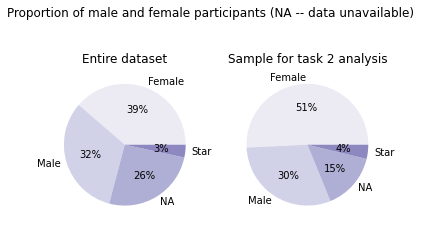

<Figure size 432x288 with 0 Axes>

In [18]:
#gender plot; sample comparison to population
fig, axis = plt.subplots(1,2)
pie_palette = sns.color_palette('Purples')[0:5]
labels = ['Female','Male', "NA", 'Star']

axis[0].pie(users['gender'].value_counts(dropna=False), labels=labels, colors=pie_palette, autopct='%.0f%%')
axis[0].set_title("Entire dataset")

axis[1].pie(gender_active.value_counts(dropna=False), labels = labels, colors = pie_palette, autopct='%.0f%%')
axis[1].set_title("Sample for task 2 analysis")

fig.suptitle("Proportion of male and female participants (NA -- data unavailable)")
plt.show()
plt.clf()

The aim here was to just verify that my sample, after having manually filtered the data, had a comparable distribution in participants to the whole dataset.

---

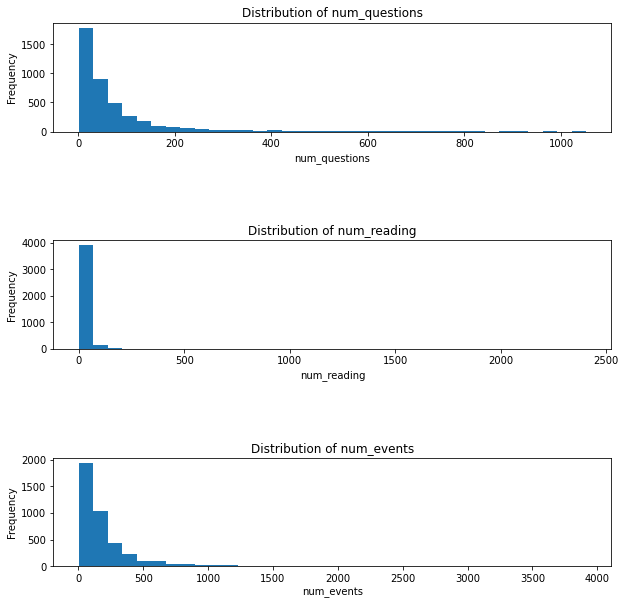

<Figure size 432x288 with 0 Axes>

In [19]:
def plot_dist(variables, bins):
    fig, ax = plt.subplots(len(variables),1)
    fig.set_size_inches(10,10)
    for i, var in enumerate(variables):
        ax[i].hist(df_features1[var], bins[i])
        ax[i].set(xlabel=var,
               ylabel="Frequency",
               title="Distribution of {}".format(var))
        
    fig.subplots_adjust(hspace=1)
        
bins = [35,35,35]       
plot_dist(['num_questions', 'num_reading', 'num_events'], bins)
plt.show() #appears to a be a very large variance in these data 
plt.clf()

In [20]:
#get some descriptive statistics (numerically)
feature_list = [df_features1['num_events'], 
                df_features1['num_questions'], 
                df_features1['percentage_correct'], 
                df_features1['num_reading']]

descr_stats = {'Mean': np.mean(feature_list,1),
               'Median':np.median(feature_list,1),
               'Mode': (stats.mode(feature_list,axis=1)[0])[:,0],
               'Variance':np.var(feature_list,1),
               'Std': np.std(feature_list,1),
               'Minimum': np.min(feature_list,1),
               '25%': np.percentile(feature_list, 25, axis=1),
               '75%': np.percentile(feature_list, 75, axis=1),
               'Maximum': np.max(feature_list,1)}

df_descr_stats = pd.DataFrame(descr_stats, index=num_vars)

In [21]:
df_descr_stats #here we have stds > mean in nearly all cases

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
num_events,226.503996,125.000000,61.0,101436.118233,318.490374,4.000000,62.000000,251.000000,3914.0
num_questions,74.957617,38.000000,12.0,11739.652599,108.349677,1.000000,18.000000,85.000000,1052.0
percentage_correct,48.976039,48.571429,50.0,361.547668,19.014407,3.030303,35.849057,61.016949,100.0
num_reading,18.487043,6.000000,2.0,3168.529319,56.289691,1.000000,2.000000,15.000000,2404.0


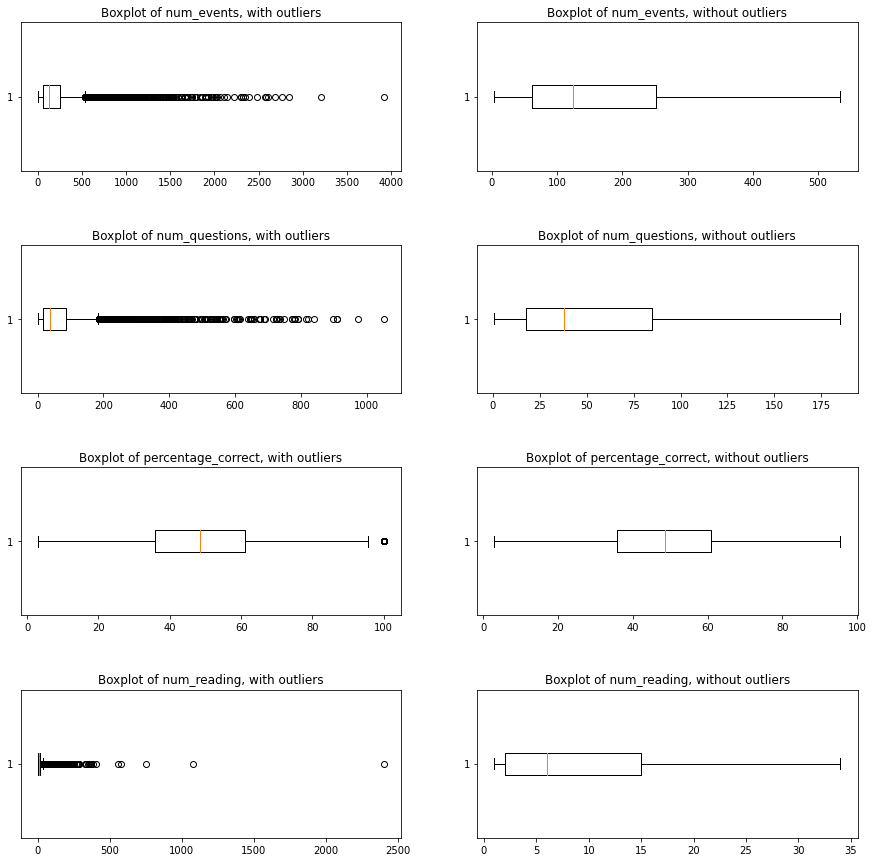

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(4,2, figsize=(15,15))

for i in range(4): 
    ax[i,0].boxplot(df_features1[num_vars[i]], vert=False)
    ax[i,0].set_title(f"Boxplot of {num_vars[i]}, with outliers")
    ax[i,1].set_title(f"Boxplot of {num_vars[i]}, without outliers")
    ax[i,1].boxplot(df_features1[num_vars[i]], showfliers=False, vert=False)
    
plt.subplots_adjust(hspace=0.5)
plt.show()  #still a strong positive skew for features with high variance
plt.clf()

---
With the exception of `percentage_correct`, the distribution of the numerical variables is quite similar (as seen in both the histograms and the boxplots), in that there is a very strong positive skew, and exceptionally high variances. This suggests that the data is plagued by outliers, but then if there are so many, it is natural to ask what features of the platform could lead to this. For example, if students were required to repeatedly answer a question until it was evaluated as correct, then they would register far more `num_questions` than some others. Another question: what degree of autonomy were the students given? A large amount of freedom would mean that we'd probably see conscientious and studious pupils using the platform more to improve their performance in class. Even upon removing the outliers, there is still a noticeable positive skew in all of these numerical variables (bar `percentage_correct`). Athough, since people's use of online platforms can vary wildly (for a variety of reasons), we should not expect school pupils to escape this phenomenon, but next steps are to deduce the causes of this behaviour in this setting. 

---

p = 2.79424e-12
The null hypothesis can be rejected


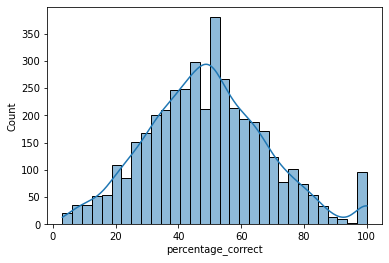

<Figure size 432x288 with 0 Axes>

In [23]:
def test_normality(data): #borrowed from demo notebook
    k2, p = stats.normaltest(data)
    alpha = 0.01
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")


test_normality(df_features1['percentage_correct'])
sns.histplot(data=df_features1, x = 'percentage_correct', kde=True) 
plt.show() #spike at percentage_correct == 1 violates normality
plt.clf()

p = 0.00558023
The null hypothesis can be rejected


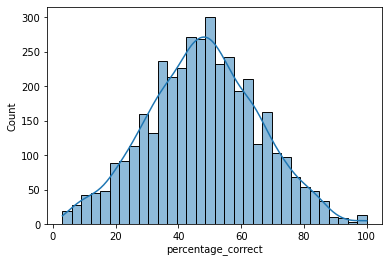

<Figure size 432x288 with 0 Axes>

In [24]:
df_features1_new = df_features1[df_features1['num_questions'] > 5] #remove edge students for comparison
test_normality(df_features1_new['percentage_correct'])
sns.histplot(data=df_features1_new, x = 'percentage_correct', kde=True) 
plt.show()
plt.clf()

---
From the descriptive statistics above, we saw that the distribution of `percentage_correct` was pretty symmetric, so now we test for normailty (using D’Agostino and Pearson's test). The test performed above tells us that the data is likely not normally distributed. Now, we can potentially see why normality was violated: a spike at `percentage_correct == 100` defies the exponetially decaying tail of a normal density. This spike likely originates from a number of students having answered only one question -- however, upon removing them from the data set, the test gave the same result. In order for the test to agree that the data is normal, we need to only consider students who answered at least 11 questions, which happens to be the 17th percentile of the `num_questions_comp` variable used in the feature set. 



In [25]:
pd.Series(num_questions_comp).quantile(0.17)

11.0

Now, what remains is to consider what distribution we might expect from this variable. Should it be normal? One would certainly expect the 100% mark to lie in the tail of the distribution, but even after removing very inactive students this doesn't change. What defines active? A question to ponder. I've currently defined it as a students who is recorded in each dataset after filtering. Settling this could help us decide what concessions need to be made when interpreting the data. 

---

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

<b> Feature 1:</b> `canton`. It is certainly of interest to see if geography has an effect on how well students use the app. We all know how odd it is that each canton has their own system of education and their own practices. Factoring in the canton in which the students use the app could lead to some interesting mixed effects when we start doing some statistical modelling. 

<b>Feature 2:</b> `avg_time_correct`. How long are students taking to get a correct answer on average? Is there a correlation between this and higher performing students (which we would anticipate to be negative if there is one). 

In [26]:
canton = users[users['user_id'].isin(active_users)]['canton']
df_features1['canton'] = list(canton)

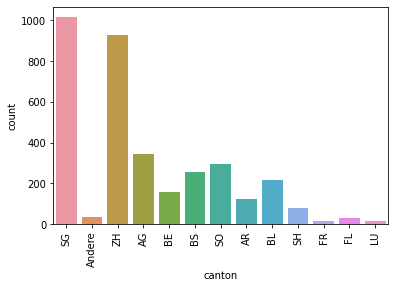

In [27]:
fig, ax = plt.subplots()

sns.countplot(x=df_features1['canton'])
plt.xticks(rotation=90)

plt.show()

pd.options.mode.chained_assignment = None #suppress warning message about dataframe subsetting 

canton_props = pd.DataFrame()
canton_props['prop'] = canton.value_counts()/canton.value_counts().sum()

Clearly there is a lot of variation between frequencies of students from each canton. So there is potential for differences between cantonal groups, due to sample sizes, and we shoudl probably account for this. Culturally speaking, since the app is used for learning German, but in  Alemannic Switzerland the use of German is very diverse. This could have a measurable impact.


---

In [28]:
def days_hours_minutes_seconds(td): #conversion of a time stamp
    return td.dt.days, td.dt.seconds//3600, (td.dt.seconds//60)%60, td.dt.seconds

td = pd.to_datetime(transactions_eval_correct['commit_time'], unit='ms') - pd.to_datetime(transactions_eval_correct['start_time'], unit='ms')
transactions_eval_correct['time_taken'] = days_hours_minutes_seconds(td)[3] 

avg_time_correct = transactions_eval_correct.pivot_table(index='user_id', values='time_taken', aggfunc=np.mean)['time_taken'].reset_index()

df_features1['avg_time_correct'] = list(avg_time_correct[avg_time_correct['user_id'].isin(active_users)]['time_taken'])

<AxesSubplot:xlabel='avg_time_correct'>

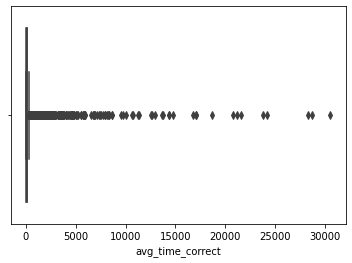

In [29]:
sns.boxplot(data=df_features1, x="avg_time_correct") #outliers heavily skew distribution (8 hr response times ?!)

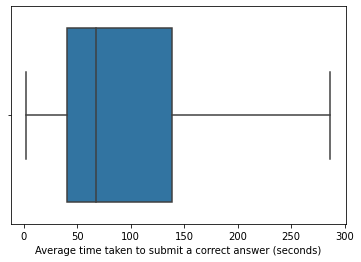

In [30]:
sns.boxplot(data=df_features1, x="avg_time_correct", showfliers=False)
plt.xlabel("Average time taken to submit a correct answer (seconds)") 
plt.show() #without outliers students take between seconds and 5 mins

---
We find here data describing something which is not uncommon in the usage of online platforms -- not registering activity for a very long while. In the first boxplot, we see that some students took over 8 hours to commit a correct answer, however upon removing these outliers the distribution shows a more reasonable range of 0 to 5 minutes for responding to a question. Since time is an important element of the datasets, we will have to take note of that. 

---

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

<b> Comparison 1: </b> `aa_score` vs `percentage_correct`. In this section, we will further define a student's so-called `aa_score`, which is a variable encoding their 'academic activity' on the site. It is defined as the sum of number of questions answered and number of times they have gone to the theory section in the app, as a percentage of the total number of events. You might imagine that students who are more academically engaged will perform better, and that forms my hypothesis.  

<b> Comparison 2: </b> `avg_time_correct` vs `percentage_correct`. Are the students who answer questions the fastest among those who scored the best? Hypothesis: There is little correlation between `avg_time_correct` and `percentage_correct`. Why? For instance, a student may answer a question *quickly* for a variety of reasons: strong understanding; weak understanding but isn't aware of this, or laziness -- these are just examples. Indeed, for the two latter cases you would find that these students do not perform well overall. These could introduce a large amount of variation that could mask an correlation. 

In [31]:
def corr(x, y, **kwargs):
    """
    Calculate the correlation coefficient between two variables
    """
    
    # Calculate the value
    coef, pvalue = stats.pearsonr(x, y) #pearsons sample correlation and corresponding hyp test
    # Make the label
    label = (r'$r$ = ' + str(round(coef, 2)), r'$p$ = ' + str(round(pvalue,2)))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.1, 0.95), size = 12, xycoords = ax.transAxes)
    

In [32]:
#academic activity score
df_features1['aa_score'] = (df_features1['num_reading'] + df_features1['num_questions'])/(df_features1['num_events'])

cols = ['num_questions', 'num_events', 'num_reading', 'avg_time_correct'] 

Q1 = df_features1[cols].quantile(0.25)
Q3 = df_features1[cols].quantile(0.75)
IQR = Q3 - Q1

df_features1_nout = df_features1[~((df_features1[cols] < (Q1 - 1.5 * IQR)) | 
                                   (df_features1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)] #outlier removal 

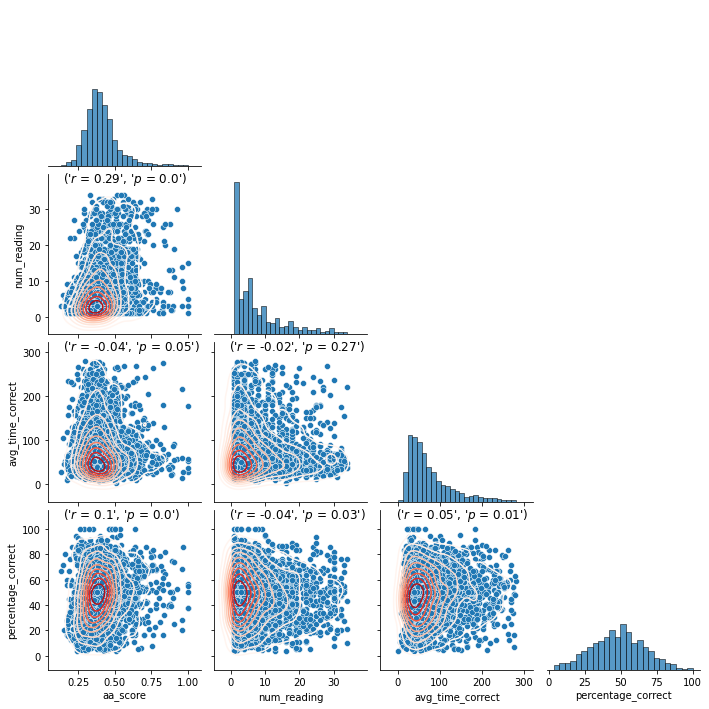

In [33]:
g_paired = sns.pairplot(data = df_features1_nout[df_features1_nout['num_questions'] > 5], 
                        x_vars=['aa_score', 'num_reading', 'avg_time_correct', 'percentage_correct'],
                        y_vars=['aa_score', 'num_reading', 'avg_time_correct', 'percentage_correct'],
                        corner=True,
                        diag_kind='hist',
                        diag_kws={'bins':25})
g_paired.map_lower(sns.kdeplot, cmap='Reds')
g_paired.map_lower(corr)

For each plot, above it you will find that $r$ is Pearson's sample correlation, and $p$ is the p-value for the hypothesis test for correlation. 

<b> Comparison 1: </b> Surprisingly, my data suggests a minor negative but statistically significant correlation between the two variables. There seems to be some hidden elements/predictors here which are contributing to this result. 

<b> Comparison 2: </b> Again, we get a statistically significant correlation here but with a minor positive correlation. The correlation here is only very minor, but perhaps this suggests that there's some sort of middle ground between answering questions quickly and perhaps taking a bit longer. Let's call that field: 'answering questions *thoughtfully*'. Although, once again, I think a deeper dive into the data set is necessary to elicit any blindingly obvious relationships. 

Other relationships and their correlations are there for interest too. (Note: we remove outliers to try and investigate the relationships without the observations being misled by the anomalous points).



---

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

---

There are $52$ weeks in the data set (which is an entire year). The first $13$ I believe coincide with the first semester. 

In [44]:
events['week'] = pd.to_datetime(events.loc[:,'timestamp'], unit='ms').dt.isocalendar().week
transactions_answer_submission['week'] = pd.to_datetime(transactions_answer_submission.loc[:,'commit_time'], unit='ms').dt.isocalendar().week
transactions_eval_correct['week'] =pd.to_datetime(transactions_eval_correct.loc[:,'commit_time'], unit='ms').dt.isocalendar().week

week_limit = 13
events_weeks = events[events['week'] <= week_limit]
trans_ans_weeks = transactions_answer_submission[transactions_answer_submission['week'] <= week_limit]
trans_ev_cor_weeks = transactions_eval_correct[transactions_eval_correct['week'] <= week_limit] 

In [45]:
#convert week into a factor variable 
events_weeks['week'] = events_weeks.loc[:,'week'].astype(object)
trans_ans_weeks['week'] = trans_ans_weeks.loc[:,'week'].astype(object)
trans_ev_cor_weeks['week'] = trans_ev_cor_weeks.loc[:,'week'].astype(object)

In [46]:
#count contributions per user_id for each week 
events_weeks_pvt = events_weeks.pivot_table(index=['user_id', 'week'], values='event_id', aggfunc='count')
events_weeks_readings_pvt = events_weeks[events_weeks['action']=='GO_TO_THEORY'].pivot_table(index=['user_id', 'week'], 
                                                                                             values='action', 
                                                                                             aggfunc='count')
trans_ans_weeks_pvt = trans_ans_weeks.pivot_table(index=['user_id','week'], values='evaluation', aggfunc='count')
trans_ev_cor_pvt = trans_ev_cor_weeks.pivot_table(index=['user_id','week'], values='evaluation', aggfunc='count')

---
We find that some students have data missing for some weeks. I have chosen to fill in the missing weeks for those students with essentially zero activity. This is a contentious decision, since if there are many zeros it could lead to an underestimation of the true averages. However, I'm making the assumption that if the students have used the app repeatedly for many weeks, then we should record missing information as a lack of activity in the app. Although, in a repeat analysis, I would make the reverse the decision of simply removing these students and comparing. 

---

In [47]:
#reindex to fill in missing weeks
def week_reindex(dfs, week_limit):
    weeks = list(range(1,week_limit+1))
    
    for i in range(len(dfs)):
        mux = (pd.MultiIndex.from_product((dfs[i].index.get_level_values(0).unique(), weeks)))
        dfs[i] = dfs[i].reindex(mux, fill_value=0).rename_axis(['user_id', 'week']).reset_index()
    
    return dfs[0], dfs[1], dfs[2], dfs[3]

In [48]:
dfs_list = [events_weeks_pvt, events_weeks_readings_pvt, trans_ans_weeks_pvt, trans_ev_cor_pvt]
events_t, readings_t, trans_ans_t, trans_ev_cor_t = week_reindex(dfs_list, week_limit)

df_features_weekly = events_t.merge(readings_t, on=['user_id','week']) \
                        .merge(trans_ans_t, on=['user_id','week']) \
                        .merge(trans_ev_cor_t, on=['user_id', 'week'], suffixes=(None, '_correct'))
df_features_weekly.rename(columns={'event_id':'num_events','evaluation':'num_questions', 'action':'num_reading'}, 
                          inplace=True)
df_features_weekly['percentage_correct'] = df_features_weekly['evaluation_correct']/df_features_weekly['num_questions']

#set 0/0 percentage_correct calculations to 0
df_features_weekly = df_features_weekly.fillna(0) 

In [49]:
print(f"We have {df_features_weekly.nunique()['user_id']} distinct user data to study over time")
df_features_weekly.head()

We have 1503 distinct user data to study over time


,user_id,week,num_events,num_reading,num_questions,evaluation_correct,percentage_correct
0,387604,1,1,0,1,0,0.0
1,387604,2,2,0,2,2,1.0
2,387604,3,8,5,1,0,0.0
3,387604,4,0,0,0,0,0.0
4,387604,5,0,0,0,0,0.0


#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

---
**Hypothesis:** Over the first thirteen weeks, there will be an increasing trend in all features. 

*Justification*: As students become more familiar with the app, and as it becomes more integrated into their currciulum they will use it more -- this justifies the hypothesis for all features bar ``percentage_correct``. I justify the latter by suggesting the students' knowledge will increase of the semester, and therefore we expect to see an increasing trend (in average).  

In [52]:
feature_avgs = df_features_weekly.groupby('week').mean()[num_vars].reset_index()
feature_avgs.head()

,week,num_events,num_questions,percentage_correct,num_reading
0,1,15.777112,7.224218,0.101807,1.658017
1,2,16.592814,8.772455,0.109820,1.107119
2,3,18.360612,8.839654,0.148898,3.026613
3,4,15.988689,7.382568,0.151315,2.438456
4,5,10.480373,5.272122,0.101038,1.274118


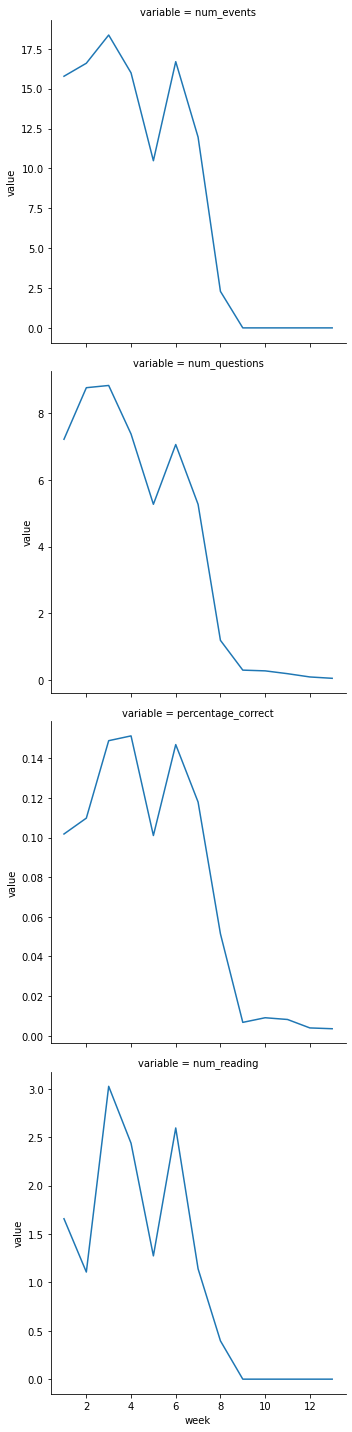

In [53]:
df_feature_avgs_melt = feature_avgs.melt(id_vars=['week']) #melt for easy faceted plotting 
sns.relplot(data=df_feature_avgs_melt, x='week', y='value', row='variable', kind='line', facet_kws={'sharey':False})

All variables seem to show a similar pattern here. Excluding `percentage_correct`, since that doesn't measure pure activity, we see that on the trend in activity tends to decrease towards the end of the thirteen week period, with a spike at around week 7. This is potentially because the students had a midterm test at this point, and so were more active on the online platform in order to prepare. The data osciallate quite a lot too, so it would be good to know with what consistency students were told to use the platform and perhaps compare it with the acutal frequency. 

Expectedly (but said retrospectively) usage of the system drops after thirteen weeks as we approach the Christmas break. 

---

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses? 


*Last time on... "Exploratory Data Analysis!"*: We found that percentage correct didn't show a strong correlation with any of the other features in the data frame, although there is a weak but significant correlation with the feature named `aa_score`, which is a ratio of students' academic actions to 'other actions'. 

*Today!* Now we test to see which features might be more important in the prediction of student performance, since even if we do not see a strong correlation, this information could point us in the right direction to find what is obscuring our view of the relationships. 

In [41]:
from pymer4.models import Lm
from pymer4.models import Lmer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

In [42]:
df_features = df_features1.reset_index()

df_features = df_features.assign(passed = lambda df: df['percentage_correct'] > 40)
df_features['passed'] = df_features['passed'].astype(int)
df_features = df_features.dropna() #dropnas for modelling purposes. 

### Important predictors 

**Hypothesis:** Percentage correct is much more strongly predicted by the academic activity score than the average time it takes them to get a correct answer.  

In [43]:
model_fe = Lm("percentage_correct ~ aa_score + avg_time_correct",
              data=df_features[df_features['percentage_correct'] < 100])
print(model_fe.fit())
results_fe = model_fe.data

Formula: percentage_correct~aa_score+avg_time_correct

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 3480	 R^2: 0.006	 R^2_adj: 0.006

Log-likelihood: -14725.415 	 AIC: 29456.830	 BIC: 29475.294

Fixed effects:

                  Estimate  2.5_ci  97.5_ci     SE    DF  T-stat  P-val  Sig
Intercept           41.119  38.993   43.244  1.084  3477  37.928  0.000  ***
aa_score            11.283   6.296   16.271  2.544  3477   4.436  0.000  ***
avg_time_correct     0.000  -0.000    0.001  0.000  3477   1.581  0.114     


---

Hypothesis is verified. Although a linear fit is not great here, the $R^2$ value is rather dismal. 

### Is the first term performance a good indicator of yearly performance? 

This is in important question because its answer will help teachers decide when (and how much) intervention is necessary. The same analysis could be done on a more granular scale if the facilities for more frequent and attentive intervention are available in the school. 

**Hypothesis:** The first thirteen weeks of data on a students' academic activity and academic performance are good predictors (in the mean-square sense) of their final score after 52 weeks, with variability between cantons.  

---

We define the binary variable `passed` to be $1$ if after 52 weeks a student's grade exceeded $40%$ and $0$ otherwise. Moreover, we anticipate that, due to cantonal differences in education systems, and much data collected on differences in performance by gender, that there might be variation among the data when stratified into these categories. Hence, we will try to fit a logisitc mixed effect regression model to evaluate the hypothesis above. 

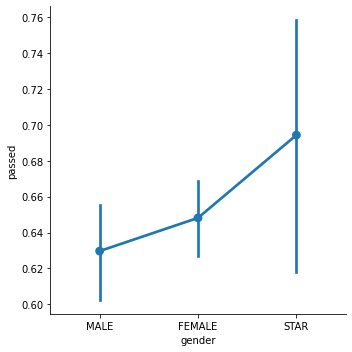

In [44]:
#check estimated probability of passing given gender
sns.catplot(data=df_features, x='gender', y='passed', kind='point')

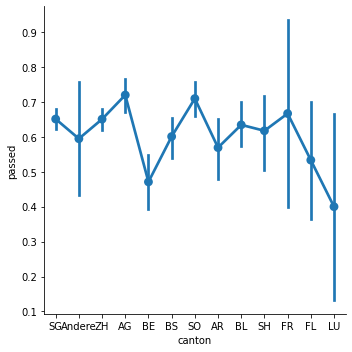

In [45]:
#check the estimated probability of passing per canton
sns.catplot(data=df_features, x='canton', y='passed', kind='point')

<AxesSubplot:xlabel='canton', ylabel='passed'>

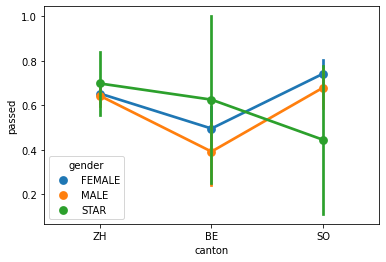

In [46]:
#check how the estimated pe=probability of passing per canton varies with gender
sns.pointplot(data=df_features[df_features['canton'].isin(['ZH', 'BE', 'SO'])],
              x='canton',
              y='passed', 
              hue='gender')

The plots above show that there is variation in the means between subgroups of the population, so including some random effects might be a good way to mitigate this. 

In [47]:
def aggregate_features(df_ui, df_byuser, week_nr):

    df_weeknr = df_byuser[df_byuser['week'] <= week_nr]
    df_return = df_weeknr.groupby(['user_id']).mean()
    df_return['user_id'] = df_return.index
    
    # Return df with aggregated features
    df_return = df_return.set_index('user_id').merge(df_ui.set_index('user_id'),
                                                     how='inner', 
                                                     left_index=True,
                                                     right_index=True)
    df_return.reset_index()
    
    return df_return

In [48]:
#select features to study 
df_ui = df_features.loc[:, ["user_id","canton","gender","aa_score","avg_time_correct","passed"]]
df_byuser = df_features_weekly.sort_values(by=['user_id', 'week']).reset_index(drop=True)

In [49]:
#split into test and train sets 
df_week13 = aggregate_features(df_ui, df_byuser, 13)

#scale to make the numbers comparable. 
df_week13['percentage_correct'] = zscore(df_week13['percentage_correct'])
df_week13['num_events'] = zscore(df_week13['num_events'])

df_train13, df_test13 = train_test_split(df_week13, test_size=0.2, random_state=0,  stratify=df_week13['passed'])

In [59]:
model13 = Lmer("passed ~ (1|canton) + aa_score + percentage_correct - 1",
               data=df_train13,
               family='binomial')
print(model13.fit())

Formula: passed~(1|canton)+aa_score+percentage_correct-1

Family: binomial	 Inference: parametric

Number of observations: 2815	 Groups: {'canton': 13.0}

Log-likelihood: -1741.263 	 AIC: 3488.525

Random effects:

               Name    Var   Std
canton  (Intercept)  0.185  0.43

No random effect correlations specified

Fixed effects:

                    Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  \
aa_score               1.209   0.694    1.724  0.263  3.350      2.002   
percentage_correct     0.624   0.515    0.732  0.055  1.866      1.674   

                    OR_97.5_ci   Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  \
aa_score                 5.605  0.770        0.667         0.849   4.604   
percentage_correct       2.080  0.651        0.626         0.675  11.260   

                    P-val  Sig  
aa_score              0.0  ***  
percentage_correct    0.0  ***  


In [60]:
predictions13 = model13.predict(df_test13, verify_predictions=False)
rmse13 = mean_squared_error(df_test13['passed'], predictions13, squared=False)

print(rmse13)

0.4599464034330736


The mean-square error is not bad, but based on the correlations above, a more complex model would be more appropriate. Although the goal of this is to investigate which features might be relevant for further applications of new methods. 

After having played around with the formula above, we find that actually modelling `gender` as a random effect adds little to the model (as a slope or an intercept) and in fact increases the root-mean-square error, and so we omit it. However, grouping by `canton` did have a positive effect on the model, and we see that both the academic score and the student's academic performance in the first thirteen weeks are positively correlated with the final grade. Interesting, and perhaps as we might expect, `aa_score` has a stronger effect on the outcome than `percentage_correct`. This suggests to us in future to ensure to always consider thoughtfully student interaction on the platform as well as what grades they're getting during the terms. 